# The four main assumptios of simple linear regression

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

Load dataset --- seaborn has the dataset built-in

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Since we're working with simple linear regression, we'll focus on the continuous variables.

### Clean data

In [3]:
penguins_sub = penguins[penguins['species'] != 'Chinstrap']
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

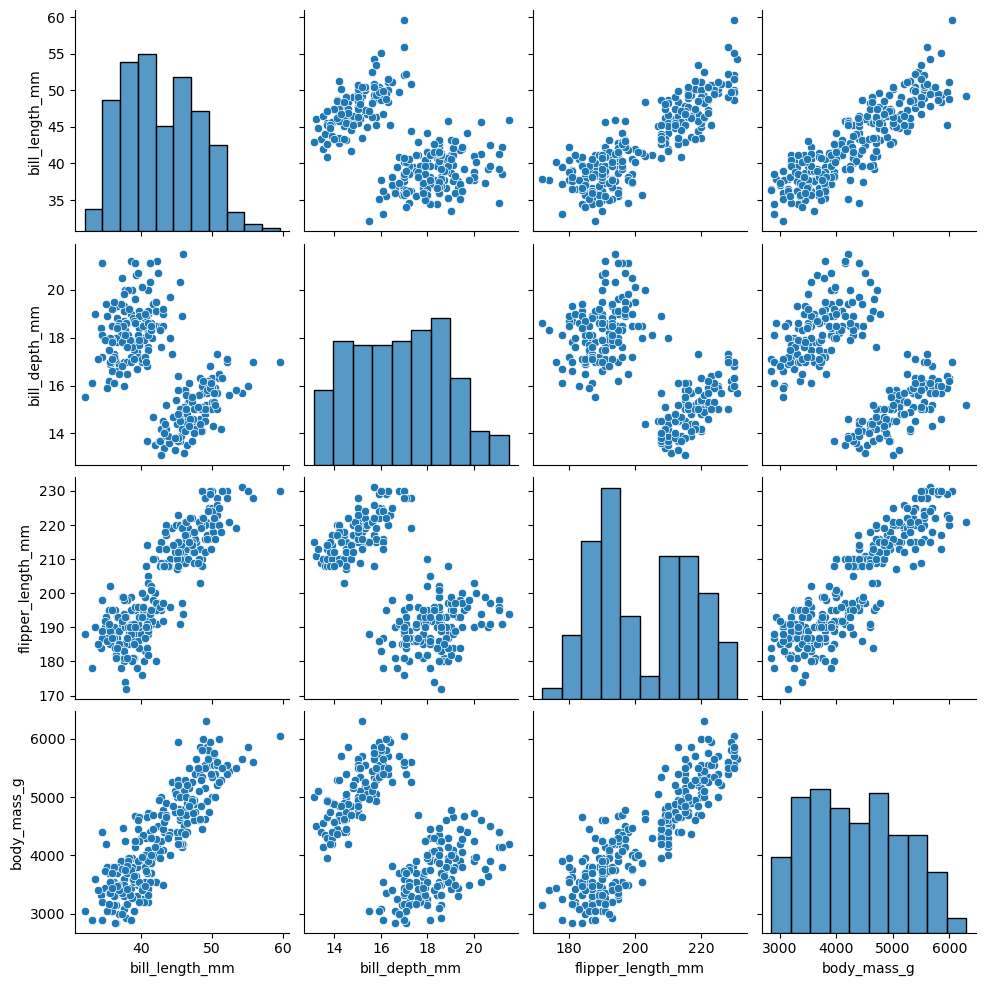

In [4]:
sns.pairplot(penguins_final)

In [5]:
#subset Data
ols_data = penguins_final[['bill_length_mm', 'body_mass_g']]

In [6]:
#Write out formula
ols_formula = 'body_mass_g ~ bill_length_mm' #after ~ variables are x

In [7]:
#import ols function
from statsmodels.formula.api import ols

### Build OLS, fit model to data

In [8]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.33e-85
Time:                        20:45:24   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residuals

In [10]:
#subset X variable
X = ols_data["bill_length_mm"]

#get predictions from the model
fitted_values = model.predict(X)

In [11]:
# Calculate residuals
residuals = model.resid

In [24]:
residuals

0      -63.254231
1      -69.730406
2     -732.682755
3      -24.397182
4     -191.492318
          ...    
260    -31.896771
261    -50.420596
262    341.293830
263    525.484103
264     61.889049
Length: 265, dtype: float64

In [37]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

In [30]:
import matplotlib.pyplot as plt

/Users/usuario/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


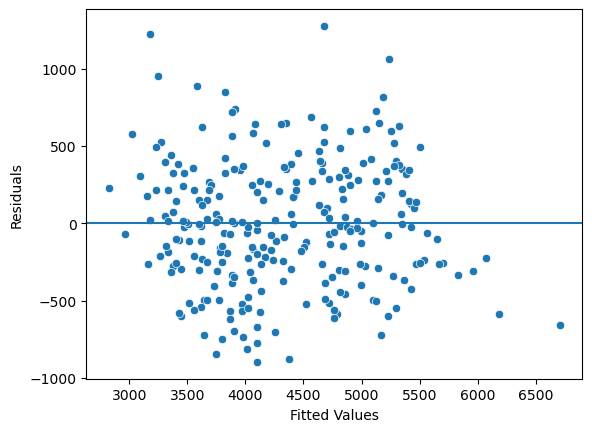

In [33]:
fig = sns.scatterplot(fitted_values, residuals)
fig.axhline(0)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
plt.show()

#### Homoscedasticity

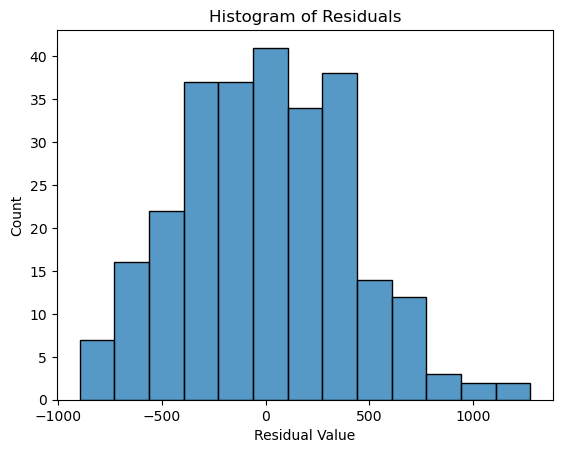

In [40]:
fig = sns.histplot(residuals)
fig.set_xlabel('Residual Value')
fig.set_title('Histogram of Residuals')
plt.show()

We can create a QQ plot to verify normality

In [41]:
import statsmodels.api as sm

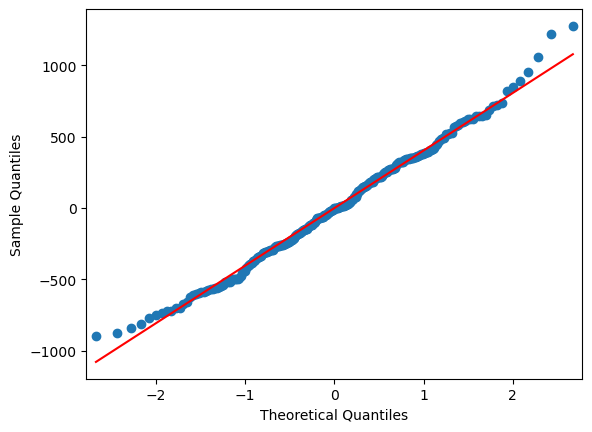

In [42]:
fig = sm.qqplot(model.resid, line= 's')
plt.show()

In [13]:
penguins = pd.read_csv('penguins.csv')

In [14]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [15]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [16]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Linearity

In [17]:
sns.pairplot(penguins)

### Normality

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

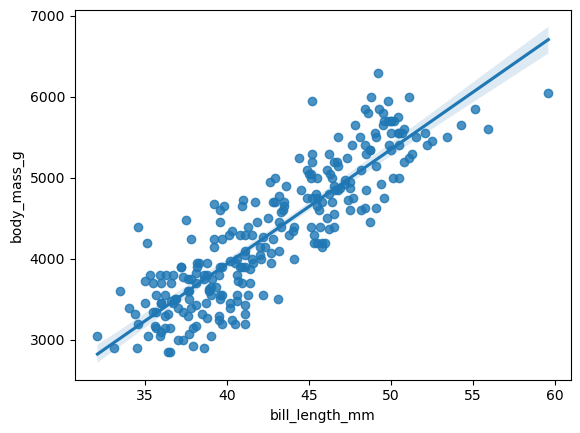

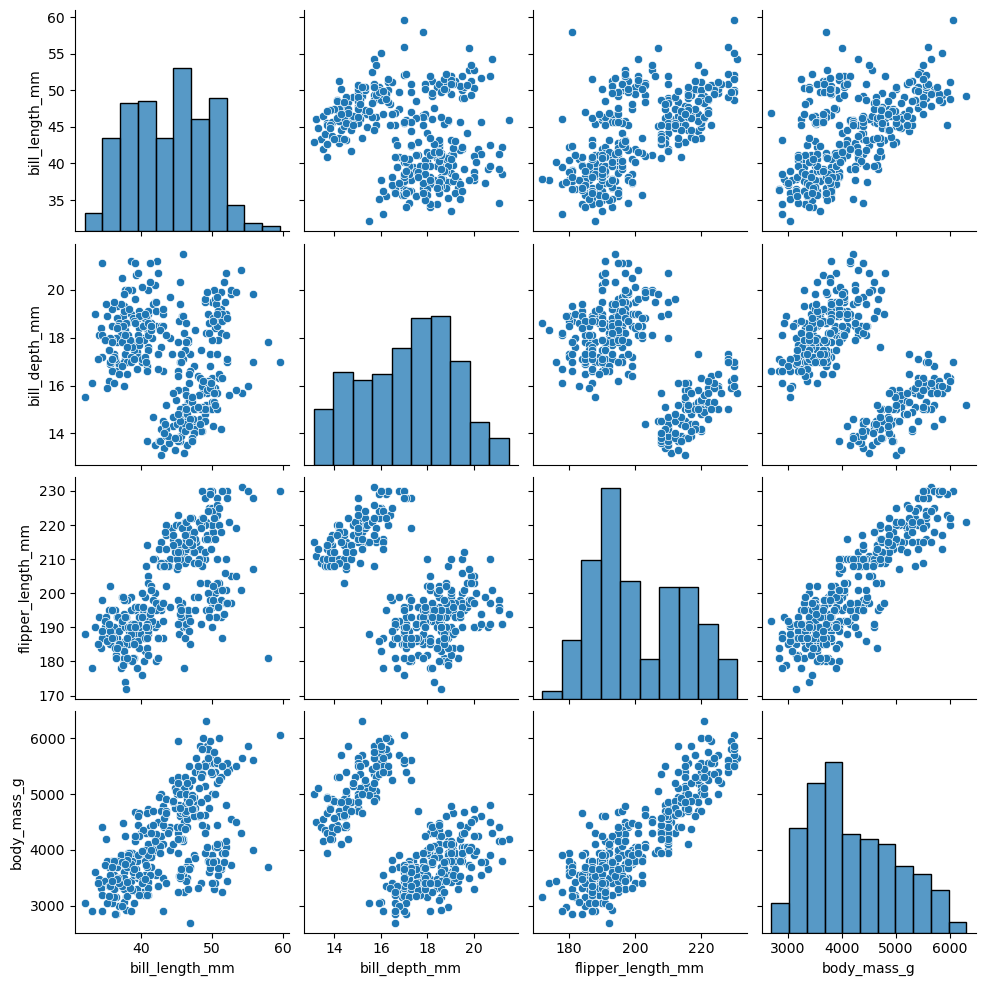

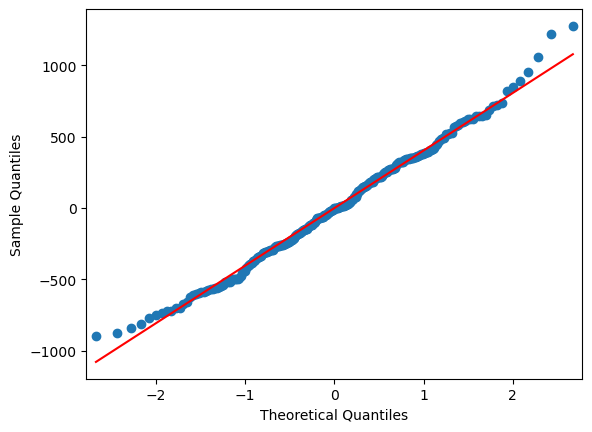

In [19]:
fig = sm.qqplot(model.resid, line ='s')
plt.show()